In [15]:
import requests
from bs4 import BeautifulSoup
import csv

# URL gốc của chuyên mục Thể Thao
base_url = "https://vnexpress.net/the-thao"

# Header giả lập trình duyệt để tránh bị chặn
headers = {"User-Agent": "Mozilla/5.0"}

# Tạo danh sách lưu dữ liệu
data = []

# Crawl 40 trang (mỗi trang khoảng 50 bài => 2000 bài)
for page in range(1, 41):
    url = f"{base_url}?page={page}"  # Sử dụng đúng URL có tham số ?page=
    print(f"🔍 Đang lấy: {url}")

    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"❌ Lỗi khi truy cập {url}")
        continue  # Bỏ qua nếu lỗi

    # Parse HTML
    soup = BeautifulSoup(response.text, "html.parser")

    # Lấy danh sách bài báo
    articles = soup.select("h3.title-news a")

    # Nếu không tìm thấy bài viết, có thể cần kiểm tra lại selector
    if not articles:
        print(f"⚠ Không tìm thấy bài báo ở trang {page}, kiểm tra lại selector.")
        continue

    # Duyệt qua từng bài báo và lưu vào danh sách
    for article in articles:
        title = article.get_text(strip=True)  # Lấy tiêu đề bài viết
        link = article["href"]  # Lấy link bài viết
        data.append([title, link])

    print(f"✅ Đã lấy {len(articles)} bài từ trang {page} (Tổng: {len(data)})")

# Ghi dữ liệu ra file CSV
csv_filename = "vnexpress_thethao.csv"
with open(csv_filename, "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Tiêu đề", "Link"])  # Ghi tiêu đề cột
    writer.writerows(data)  # Ghi dữ liệu bài báo

print(f"📁 Đã lưu {len(data)} bài báo vào file {csv_filename} ✅")


🔍 Đang lấy: https://vnexpress.net/the-thao?page=1
✅ Đã lấy 50 bài từ trang 1 (Tổng: 50)
🔍 Đang lấy: https://vnexpress.net/the-thao?page=2
✅ Đã lấy 50 bài từ trang 2 (Tổng: 100)
🔍 Đang lấy: https://vnexpress.net/the-thao?page=3
✅ Đã lấy 50 bài từ trang 3 (Tổng: 150)
🔍 Đang lấy: https://vnexpress.net/the-thao?page=4
✅ Đã lấy 50 bài từ trang 4 (Tổng: 200)
🔍 Đang lấy: https://vnexpress.net/the-thao?page=5
✅ Đã lấy 50 bài từ trang 5 (Tổng: 250)
🔍 Đang lấy: https://vnexpress.net/the-thao?page=6
✅ Đã lấy 50 bài từ trang 6 (Tổng: 300)
🔍 Đang lấy: https://vnexpress.net/the-thao?page=7
✅ Đã lấy 50 bài từ trang 7 (Tổng: 350)
🔍 Đang lấy: https://vnexpress.net/the-thao?page=8
✅ Đã lấy 50 bài từ trang 8 (Tổng: 400)
🔍 Đang lấy: https://vnexpress.net/the-thao?page=9
✅ Đã lấy 50 bài từ trang 9 (Tổng: 450)
🔍 Đang lấy: https://vnexpress.net/the-thao?page=10
✅ Đã lấy 50 bài từ trang 10 (Tổng: 500)
🔍 Đang lấy: https://vnexpress.net/the-thao?page=11
✅ Đã lấy 50 bài từ trang 11 (Tổng: 550)
🔍 Đang lấy: https:

In [16]:
from google.colab import files
files.download("vnexpress_thethao.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv("vnexpress_thethao.csv")

# Xem trước dữ liệu
df.head()


,Tiêu đề,Link
0,Argentina hạ Uruguay trong ngày vắng Messi,https://vnexpress.net/argentina-ha-uruguay-tro...
1,Quốc Hoàng thắng khi đối thủ 'đánh trượt 9' ở ...,https://vnexpress.net/quoc-hoang-thang-khi-doi...
2,Tiền vệ Nhật Bản tham vọng vô địch World Cup 2026,https://vnexpress.net/tien-ve-nhat-ban-tham-vo...
3,Cầu mây Việt Nam lần đầu vô địch World Cup,https://vnexpress.net/cau-may-viet-nam-lan-dau...
4,NaN,https://vnexpress.net/cau-may-viet-nam-lan-dau...


#Py 4

                                               title  \
0         Argentina hạ Uruguay trong ngày vắng Messi   
1  Quốc Hoàng thắng khi đối thủ 'đánh trượt 9' ở ...   
2  Tiền vệ Nhật Bản tham vọng vô địch World Cup 2026   
3         Cầu mây Việt Nam lần đầu vô địch World Cup   
4                                                NaN   

                                                Link  
0  https://vnexpress.net/argentina-ha-uruguay-tro...  
1  https://vnexpress.net/quoc-hoang-thang-khi-doi...  
2  https://vnexpress.net/tien-ve-nhat-ban-tham-vo...  
3  https://vnexpress.net/cau-may-viet-nam-lan-dau...  
4  https://vnexpress.net/cau-may-viet-nam-lan-dau...  
                                               title  \
0         Argentina hạ Uruguay trong ngày vắng Messi   
1  Quốc Hoàng thắng khi đối thủ 'đánh trượt 9' ở ...   
2  Tiền vệ Nhật Bản tham vọng vô địch World Cup 2026   
3         Cầu mây Việt Nam lần đầu vô địch World Cup   
4                                                    

<ipython-input-21-c45dad97d2e6>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos, y=counts, palette='husl')


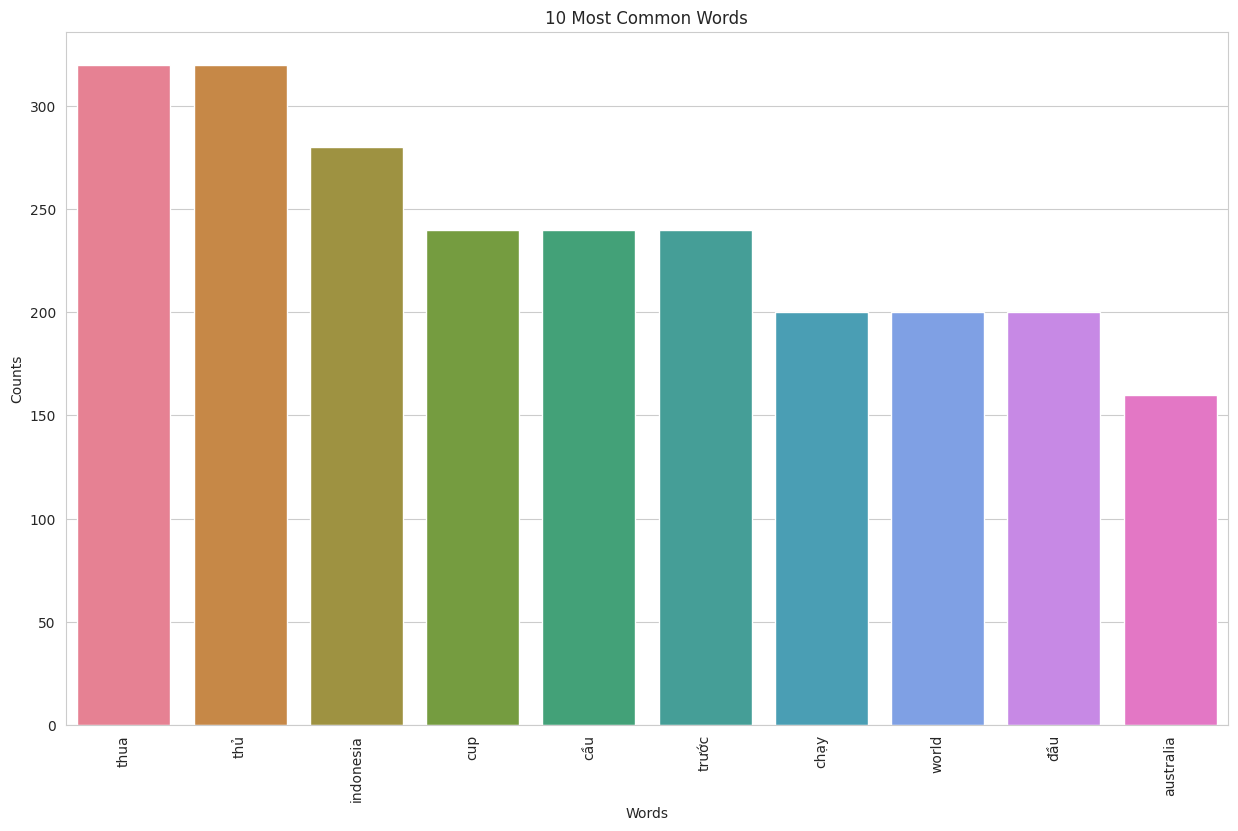

📌 Chủ đề tìm thấy qua LDA:

📌 Chủ đề #1:
địch vô cup cầu trước làm phút bù trong bị

📌 Chủ đề #2:
thủ tuyển quốc đầu cầu vệ trung brazil vinicius nha

📌 Chủ đề #3:
league thua thủ việt nam pool premier khi ngày ronaldo

📌 Chủ đề #4:
world cup hành bản nhật thua gia vệ không messi

📌 Chủ đề #5:
indonesia trước hlv thua chạy australia thần lỗi thảm như


In [21]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import warnings

warnings.simplefilter("ignore", DeprecationWarning)
sns.set_style('whitegrid')

# Đọc dữ liệu từ file CSV
df = pd.read_csv("vnexpress_thethao.csv", encoding="utf-8")

# Đổi tên cột "Tiêu đề" thành "title"
df = df.rename(columns={"Tiêu đề": "title"})

# 🔹 Xem trước dữ liệu
print(df.head())

# 🔹 Tạo bản sao để xử lý dữ liệu
papers = df.copy()

# 🔹 Xóa các cột không cần thiết
if "id" in papers.columns:
    papers = papers.drop(columns=['id'], axis=1)

# 🔹 Tiền xử lý văn bản (loại bỏ dấu câu, chuyển thành chữ thường)
def clean_text(text):
    if not isinstance(text, str):  # Kiểm tra nếu không phải string
        return ""
    text = text.lower()  # Chuyển thành chữ thường
    text = re.sub(r'[^\w\s]', '', text)  # Xóa dấu câu
    text = re.sub(r'\d+', '', text)  # Xóa số
    text = re.sub(r'\s+', ' ', text).strip()  # Xóa khoảng trắng thừa
    return text

# Thay NaN trong cột title bằng chuỗi rỗng để tránh lỗi
papers['title'] = papers['title'].fillna('')
papers['processed_text'] = papers['title'].apply(clean_text)

# 🔹 Hiển thị kết quả sau xử lý
print(papers[['title', 'processed_text']].head())

# 🔹 Tạo WordCloud từ nội dung bài báo
long_string = ' '.join(papers['processed_text'].values)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image().show()

# 🔹 Hiển thị 10 từ phổ biến nhất
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))

    for t in count_data:
        total_counts += t.toarray()[0]

    count_dict = sorted(zip(words, total_counts), key=lambda x: x[1], reverse=True)[:10]
    words, counts = zip(*count_dict)

    x_pos = np.arange(len(words))

    plt.figure(figsize=(15, 9))
    plt.subplot(title='10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.show()

# 🔹 Vector hóa dữ liệu bằng CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(papers['processed_text'])

# 🔹 Hiển thị 10 từ phổ biến nhất
plot_10_most_common_words(count_data, count_vectorizer)

# 🔹 Áp dụng LDA để phân nhóm chủ đề
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"\n📌 Chủ đề #{topic_idx + 1}:")
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# 🔹 Xác định số lượng chủ đề
number_topics = 5
number_words = 10

# 🔹 Tạo và train mô hình LDA
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=42)
lda.fit(count_data)

# 🔹 In ra các chủ đề tìm được
print("📌 Chủ đề tìm thấy qua LDA:")
print_topics(lda, count_vectorizer, number_words)


#Py 3

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF


# 📌 Đọc dữ liệu từ file CSV
df = pd.read_csv("vnexpress_thethao.csv", encoding="utf-8")

# 📌 Đổi tên cột "Tiêu đề" thành "title"
df = df.rename(columns={"Tiêu đề": "title"})

# 📌 Loại bỏ các dòng có tiêu đề bị NaN
df = df.dropna(subset=["title"])

# 📌 Xóa các cột không cần thiết (nếu có)
if "id" in df.columns:
    df = df.drop(columns=['id'], axis=1)

# 📌 Tải danh sách stop words tiếng Việt từ GitHub
stopwords_url = "https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt"
stopwords_vn = set(requests.get(stopwords_url).text.split("\n"))

# 📌 Hàm tiền xử lý văn bản
def clean_text(text):
    text = text.lower()  # Chuyển thành chữ thường
    text = re.sub(r'[^\w\s]', '', text)  # Xóa dấu câu
    text = re.sub(r'\d+', '', text)  # Xóa số
    text = re.sub(r'\s+', ' ', text).strip()  # Xóa khoảng trắng thừa
    words = text.split()
    words = [word for word in words if word not in stopwords_vn]  # Xóa stop words
    return ' '.join(words)

# 📌 Áp dụng tiền xử lý cho dữ liệu
df["processed_text"] = df["title"].astype(str).apply(clean_text)

# 📌 Vector hóa dữ liệu bằng TF-IDF
tfidf_vect = TfidfVectorizer(max_df=0.8, min_df=2)
doc_term_matrix = tfidf_vect.fit_transform(df['processed_text'])

# 📌 Áp dụng NMF để tìm chủ đề
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(doc_term_matrix)

# 📌 Lấy danh sách từ trong từ điển
feature_names = tfidf_vect.get_feature_names_out()

# 📌 Hiển thị 5 từ phổ biến nhất trong mỗi chủ đề
for i, topic in enumerate(nmf_model.components_):
    print(f"📌 Chủ đề #{i + 1}:")
    print([feature_names[j] for j in topic.argsort()[-5:]])  # Lấy 5 từ quan trọng nhất
    print("\n")

# 📌 Thêm chủ đề vào dataset
topic_values = nmf_model.transform(doc_term_matrix)
df["Topic"] = topic_values.argmax(axis=1)

# 📌 Hiển thị 5 dòng đầu tiên với chủ đề
print(df[['title', 'Topic']].head())

# 📌 Hiển thị WordCloud từ tiêu đề
long_string = ' '.join(df['processed_text'].values)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image().show()

📌 Chủ đề #1:
['giành', 'vô', 'địch', 'cup', 'world']


📌 Chủ đề #2:
['hlv', 'thảm', 'australia', 'thua', 'indonesia']


📌 Chủ đề #3:
['cầu', 'quốc', 'nam', 'việt', 'thủ']


📌 Chủ đề #4:
['thành', 'hành', 'marathon', 'runner', 'chạy']


📌 Chủ đề #5:
['brazil', 'vinicius', 'trận', 'bù', 'phút']


                                               title  Topic
0         Argentina hạ Uruguay trong ngày vắng Messi      0
1  Quốc Hoàng thắng khi đối thủ 'đánh trượt 9' ở ...      2
2  Tiền vệ Nhật Bản tham vọng vô địch World Cup 2026      0
3         Cầu mây Việt Nam lần đầu vô địch World Cup      0
5  Runner nữ bị ung thư vú chạy ngực trần gây quỹ...      3


#Py 2

In [25]:

# 🔹 Đọc dữ liệu từ file CSV
df = pd.read_csv("vnexpress_thethao.csv", encoding="utf-8")

# 🔹 Đổi tên cột "Tiêu đề" thành "title"
df = df.rename(columns={"Tiêu đề": "title"})

# 🔹 Xóa các dòng có dữ liệu bị thiếu
df = df.dropna()

# 🔹 Tiền xử lý văn bản (chuyển thành chữ thường, xóa số, xóa dấu câu)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Xóa dấu câu
    text = re.sub(r'\d+', '', text)      # Xóa số
    text = re.sub(r'\s+', ' ', text).strip()  # Xóa khoảng trắng thừa
    return text

df['processed_text'] = df['title'].apply(clean_text)

# 🔹 Tạo ma trận từ điển bằng CountVectorizer (lọc stopwords tiếng Anh & tần suất 2-80%)
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df['processed_text'])

# 🔹 Áp dụng mô hình LDA để trích xuất chủ đề
lda = LDA(n_components=5, random_state=42)
lda.fit(doc_term_matrix)

# 🔹 Lấy 10 từ phổ biến nhất cho từng chủ đề
def print_topics(model, vectorizer, n_top_words=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"\n📌 Chủ đề #{idx + 1}:")
        print(" ".join([words[i] for i in topic.argsort()[-n_top_words:]]))

print("📌 Các chủ đề được phát hiện:")
print_topics(lda, count_vect, 10)

# 🔹 Gán chủ đề vào dataframe
topic_values = lda.transform(doc_term_matrix)
df['Topic'] = topic_values.argmax(axis=1)

# 🔹 Hiển thị một số dữ liệu sau phân loại
print(df[['title', 'Topic']].head())

# 🔹 Vẽ WordCloud để xem trực quan các từ phổ biến nhất
long_string = ' '.join(df['processed_text'].values)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image().show()

📌 Các chủ đề được phát hiện:

📌 Chủ đề #1:
thiện tuổi lan bị làm phút bù trong trước cầu

📌 Chủ đề #2:
vinicius brazil trung hậu cầu quốc đầu vệ thủ tuyển

📌 Chủ đề #3:
đầu ngày khi premier pool nam việt thủ thua league

📌 Chủ đề #4:
marathon thành không gia bản nhật hành thua cup world

📌 Chủ đề #5:
như thảm lỗi thần ronaldo chạy thua hlv trước indonesia
                                               title  Topic
0         Argentina hạ Uruguay trong ngày vắng Messi      0
1  Quốc Hoàng thắng khi đối thủ 'đánh trượt 9' ở ...      2
2  Tiền vệ Nhật Bản tham vọng vô địch World Cup 2026      3
3         Cầu mây Việt Nam lần đầu vô địch World Cup      0
5  Runner nữ bị ung thư vú chạy ngực trần gây quỹ...      0
